In [1]:
%matplotlib inline

import sys
import pandas as pd
import os
import numpy as np

sys.path.insert(0, '..')
from glmhmm.glm_hmm import *
import matplotlib.pyplot as plt
from glmhmm.fitting import CrossValidation, GridSearch, mostProbSeq
from preprocessing import utils2 as ut
from glmhmm.utils import find_last_non_nan_elements

#parentdir = '/Users/harshagurnani/Documents/GitHub/behavior-glm-hmm/'

## single session

In [2]:
file = '../example_data/sub_455220/sub-455220_ses-20190729T145044_trial_events.csv'

In [3]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(file, 3, True, 4)

In [4]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[ 0.07988902,  0.02313343,  0.11149532,  0.08869462,  0.0437996 ,
         0.09866685,  0.01968179, -0.00449617,  0.07924501, -0.05678386],
       [ 0.18479812,  0.21234726,  0.12835866,  0.19019702,  0.06996897,
         0.18908774,  0.21762641,  0.09696746,  0.08731204,  0.14319159],
       [-0.09179455, -0.09593277, -0.06675737, -0.13619348, -0.01699039,
        -0.09622317, -0.04490419, -0.04414283, -0.16941209, -0.09524243]])

In [10]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]
pi0 = pi0_all[i,j]

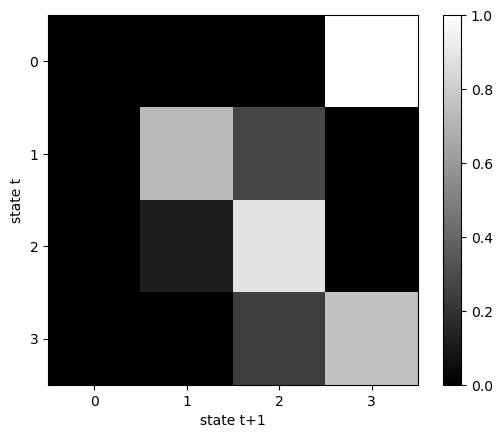

In [11]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

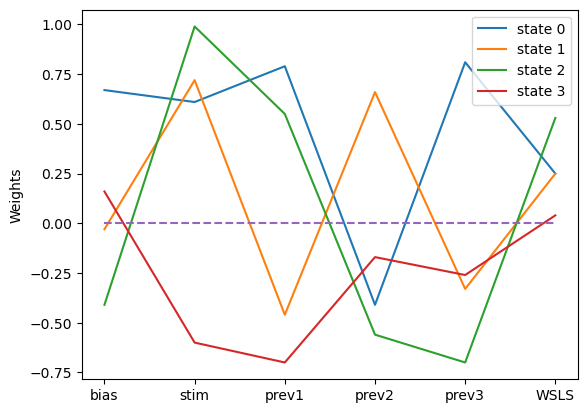

In [12]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

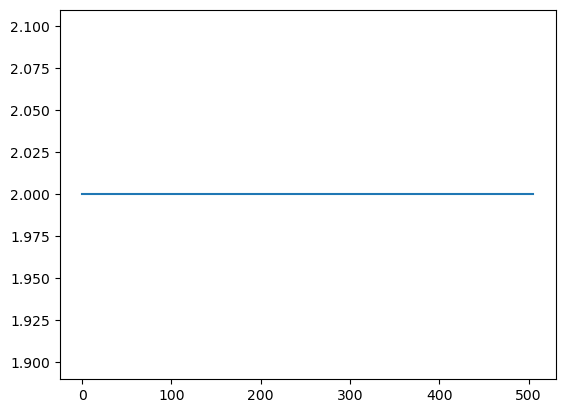

In [13]:
data = ut.Dataloader_sess(file, nprev = 3, exig = True)
X = data[:,1:-1]
y = data[:,-1]
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## single animal

In [21]:
folder = '../example_data/sub_455220/'
nprev=3
nlat=2
exig=True

data = ut.Dataloader_ani(folder, nprev = nprev, exig = exig)
X = data[:,1:-1]
y = data[:,-1]

In [22]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(folder, nprev, exig, nlat)

In [23]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[-0.30120616, -0.29023461, -0.34132658, -0.3187539 , -0.30362891,
        -0.30953593, -0.29071002, -0.33484072, -0.3104667 , -0.34973674],
       [-0.2067021 , -0.19741113, -0.20676156, -0.19294127, -0.16216646,
        -0.25064852, -0.23776202, -0.27311172, -0.21677766, -0.23664599],
       [ 0.01513477,  0.07115021,  0.05956911,  0.05149536,  0.06906315,
         0.05196001,  0.05722492,  0.0737215 ,  0.0797562 ,  0.09995888]])

In [31]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]

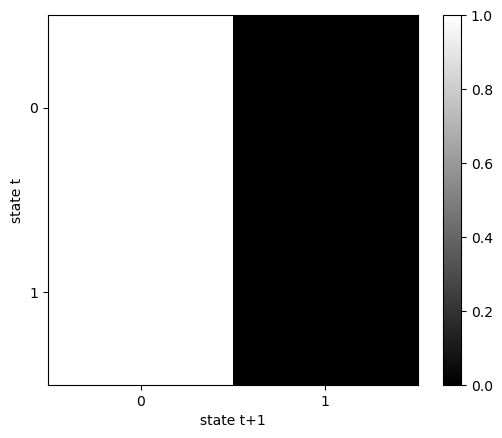

In [32]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

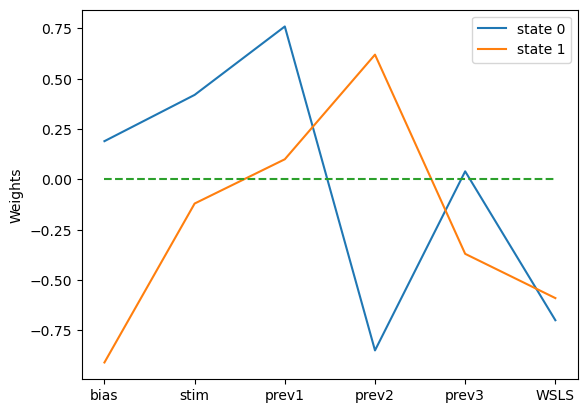

In [33]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

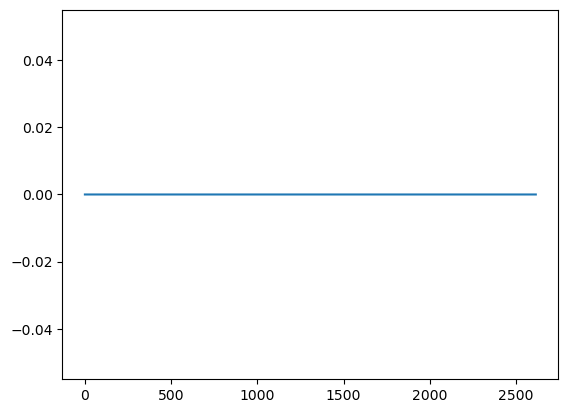

In [34]:
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## multiple animals

In [2]:
folder=None
nprev=3
exig=True
nlat=4
num_folds = 10
num_init = 1

In [3]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(folder, nprev, exig, nlat, num_folds=num_folds, num_init=num_init)

../example_data/sub_479121
../example_data/sub_455220
../example_data/sub_480928
../example_data/sub_455219


In [4]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[ 0.17538262,  0.08632216,  0.1169082 ,  0.10189255,  0.11359243,
         0.12909695, -0.04362019,  0.10400037,  0.10523366,  0.13103734]])

In [5]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]

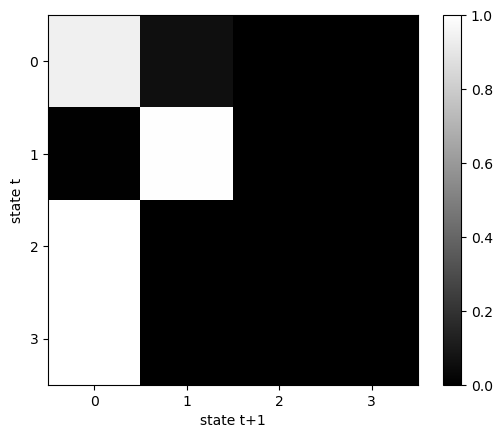

In [6]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

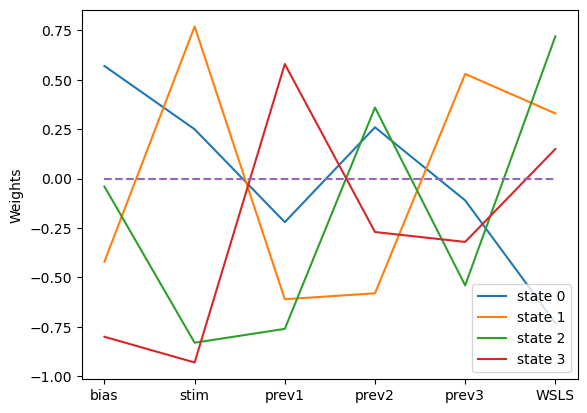

In [7]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()